In [114]:
from recommenders.models.newsrec.models.lstur import LSTURModel

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud


In [2]:
column_names = ['Impression ID', 'User ID', 'Time', 'History', 'Impressions']
behaviors_df = pd.read_csv("Mind Dataset/MINDsmall_train/behaviors.tsv", sep='\t', names=column_names)
behaviors_df.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


# Data Cleaning (Behaviors Dataframe)

## Split the History & Impressions Column into Separate Rows or a List:

In [3]:
# Ensure History & Impressions is stored as a list
behaviors_df['History'] = behaviors_df['History'].str.split(' ')
behaviors_df['Impressions'] = behaviors_df['Impressions'].str.split(' ')

behaviors_df['Time'] = pd.to_datetime(behaviors_df['Time'])

behaviors_df.head()


,Impression ID,User ID,Time,History,Impressions
0,1,U13740,2019-11-11 09:05:58,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]"
1,2,U91836,2019-11-12 18:11:30,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297..."
2,3,U73700,2019-11-14 07:01:48,"[N10732, N25792, N7563, N21087, N41087, N5445,...","[N50014-0, N23877-0, N35389-0, N49712-0, N1684..."
3,4,U34670,2019-11-11 05:28:05,"[N45729, N2203, N871, N53880, N41375, N43142, ...","[N35729-0, N33632-0, N49685-1, N27581-0]"
4,5,U8125,2019-11-12 16:11:21,"[N10078, N56514, N14904, N33740]","[N39985-0, N36050-0, N16096-0, N8400-1, N22407..."


# Data Cleaning (News Dataframe)

In [4]:
news_column_names = ['News ID', 'Category', 'SubCategory', 'Title', 'Abstract','URL','Title Entities','Abstract Entities']
news_df = pd.read_csv("Mind Dataset/MINDsmall_train/news.tsv", sep='\t',names=news_column_names)
news_df.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [5]:

political_keywords = ["Democrat", "Republican", "conservative", "liberal", "politician", "government", "election", "party"]

def find_political_keyword(entities):
    for keyword in political_keywords:
        if keyword.lower() in str(entities).lower():
            return keyword 
    return "Non-Political"  

news_df["Political Group Title"] = news_df["Title"].apply(find_political_keyword)
news_df["Political Group Abstract"] = news_df["Abstract"].apply(find_political_keyword)




# Merging Both Dataframes

In [6]:
column_names = ['Impression ID', 'User ID', 'Time', 'History', 'Impressions',]
behaviors_df = pd.read_csv("Mind Dataset/MINDsmall_train/behaviors.tsv", sep='\t', names=column_names)

behaviors_df['History'] = behaviors_df['History'].str.split(' ')
behaviors_df = behaviors_df.explode('History').rename(columns={'History': 'News_ID'})

# Load `news_df` with correct column names
news_column_names = ['News_ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'Title Entities', 'Abstract Entities']
news_df = pd.read_csv("Mind Dataset/MINDsmall_train/news.tsv", sep='\t', names=news_column_names)

# Verify column names before merging
print("behaviors_df columns:", behaviors_df.columns)
print("news_df columns:", news_df.columns)

behaviors_df columns: Index(['Impression ID', 'User ID', 'Time', 'News_ID', 'Impressions'], dtype='object')
news_df columns: Index(['News_ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL',
       'Title Entities', 'Abstract Entities'],
      dtype='object')


In [7]:
merged_df = behaviors_df.merge(news_df, on='News_ID', how='left')

In [ ]:
MERGED DATAFRAME CTR IS 0.09 OR 9%

In [ ]:
merged_df['click'] = merged_df['Impressions'].str.split('-').str[-1].astype(int)

# Calculate total clicks and total impressions
total_clicks = merged_df['click'].sum()  # Sum of 1s (clicks)
total_impressions = len(merged_df)      # Total rows (impressions)

# Calculate CTR
ctr = (total_clicks / total_impressions) * 100
ctr

9.873021792541671

: 

In [10]:
merged_df.head(5)

,Impression ID,User ID,Time,News_ID,Impressions,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,1,U13740,11/11/2019 9:05:58 AM,N55189,N55689-1 N35729-0,tv,tvnews,"'Wheel Of Fortune' Guest Delivers Hilarious, O...","We'd like to solve the puzzle, Pat: Blair Davi...",https://assets.msn.com/labs/mind/AAIORni.html,[],"[{""Label"": ""Pat Sajak"", ""Type"": ""P"", ""Wikidata..."
1,1,U13740,11/11/2019 9:05:58 AM,N42782,N55689-1 N35729-0,sports,baseball_mlb,Three takeaways from Yankees' ALCS Game 5 vict...,The Yankees kept hope alive thanks to some imp...,https://assets.msn.com/labs/mind/AAJ1mE9.html,"[{""Label"": ""New York Yankees"", ""Type"": ""O"", ""W...","[{""Label"": ""New York Yankees"", ""Type"": ""O"", ""W..."
2,1,U13740,11/11/2019 9:05:58 AM,N34694,N55689-1 N35729-0,tv,tvnews,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,https://assets.msn.com/labs/mind/AAIZa64.html,"[{""Label"": ""Rosie O'Donnell"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Rosie O'Donnell"", ""Type"": ""P"", ""Wi..."
3,1,U13740,11/11/2019 9:05:58 AM,N45794,N55689-1 N35729-0,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,https://assets.msn.com/labs/mind/AAJcQKF.html,[],"[{""Label"": ""Miami International Airport"", ""Typ..."
4,1,U13740,11/11/2019 9:05:58 AM,N18445,N55689-1 N35729-0,sports,football_ncaa,Michigan sends breakup tweet to Notre Dame as ...,"Parting is such sweet sorrow, say the Wolverines.",https://assets.msn.com/labs/mind/AAJpMXE.html,[],[]


**NULL HISOTRY DATAFRAME**

THERE ARE 3238 rows in Behaviors_df that have no history(I.e News_Id)

THERE ARE 2666 rows in news_df that have no Abstract. 3 no Title Entities and 4 no Abstract entities 

In [11]:
Nan_df = merged_df[merged_df["News_ID"].isna()]
Nan_df


Nan_df1 = Nan_df.assign(Impressions=Nan_df['Impressions'].str.split()).explode('Impressions')
Nan_df1.head(5)


Nan_df1['News_ID'] = Nan_df1['Impressions'].str.split('-').str[0]
Nan_df1['Impressions'] = Nan_df1['Impressions'].str.split('-').str[1]


merged_null_df = Nan_df1.merge(news_df, on='News_ID', how='left')

merged_null_df = merged_null_df.loc[:, ~merged_null_df.columns.str.endswith('_x')]
merged_null_df.head(5)

,Impression ID,User ID,Time,News_ID,Impressions,Category_y,SubCategory_y,Title_y,Abstract_y,URL_y,Title Entities_y,Abstract Entities_y
0,29,U33207,11/11/2019 11:09:14 AM,N62212,0,travel,travelnews,The world's first hybrid cruise ship is curren...,The MS Roald Amundsen's maiden voyage is a pol...,https://assets.msn.com/labs/mind/BBWvNny.html,[],"[{""Label"": ""MS Roald Amundsen"", ""Type"": ""V"", ""..."
1,29,U33207,11/11/2019 11:09:14 AM,N27521,0,news,newsworld,Bolivian Leader Evo Morales Steps Down,"President Evo Morales of Bolivia, who came to ...",https://assets.msn.com/labs/mind/BBWyw2S.html,"[{""Label"": ""Evo Morales"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""Evo Morales"", ""Type"": ""P"", ""Wikida..."
2,29,U33207,11/11/2019 11:09:14 AM,N28983,0,tv,tv-gallery,ICYMI: The week in TV news for Nov. 3-9,"DWTS judge frustrated with Sean Spicer's run, ...",https://assets.msn.com/labs/mind/BBWtoek.html,[],"[{""Label"": ""Donald Trump Jr."", ""Type"": ""P"", ""W..."
3,29,U33207,11/11/2019 11:09:14 AM,N12028,0,finance,markets,"Frackers Prepare to Pull Back, Exacerbating a ...",After pushing U.S. oil and natural-gas product...,https://assets.msn.com/labs/mind/BBWAqCG.html,[],[]
4,29,U33207,11/11/2019 11:09:14 AM,N25437,0,health,weightloss,Is it really easier for men to lose weight? Ex...,There are reasons men and women lose weight di...,https://assets.msn.com/labs/mind/BBWtVz8.html,[],[]


CLICK THRU RATE FOR NULL DATAFRAME IS 0.03996944587436276

In [20]:
merged_null_df['Impressions'] = merged_null_df['Impressions'].astype(int)

total_clicks = merged_null_df['Impressions'].sum() 
total_clicks

total_impressions = len(merged_null_df) 
total_impressions
total_clicks

4814/120442

0.03996944587436276

In [ ]:
# Calculate total clicks and total impressions
total_clicks = merged_null_df['Impressions'].sum()  # Sum of 1s (clicks)
total_impressions = len(merged_null_df)            # Total rows (impressions)

# Calculate CTR
ctr = (total_clicks / total_impressions) * 100

# Print the result
print(f"Click-Through Rate (CTR): {ctr:.2f}%")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

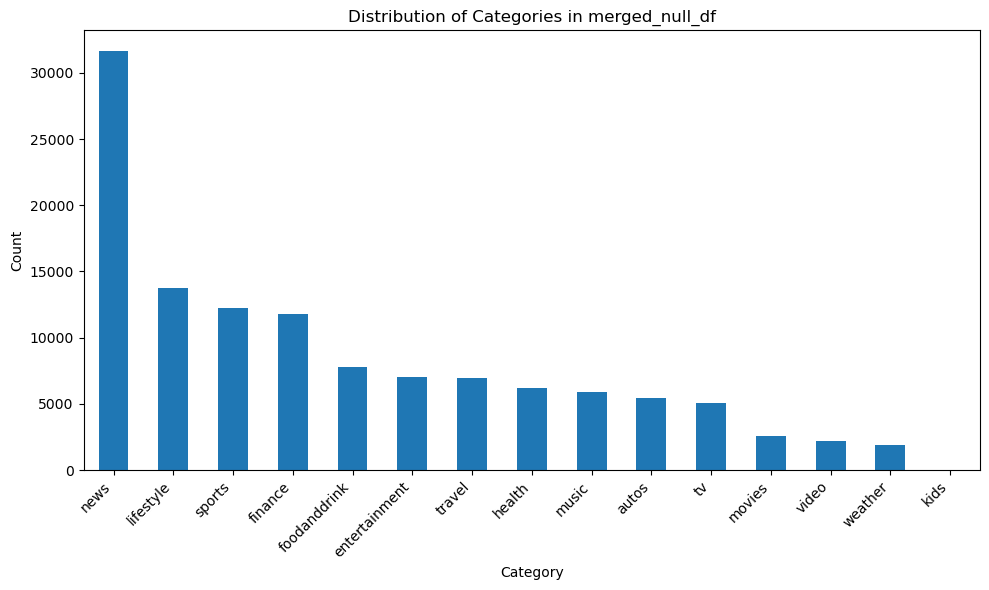

In [12]:
category_counts = merged_null_df['Category_y'].value_counts()


plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories in merged_null_df')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.tight_layout() 
plt.show()



merged_df['Clicked'] = merged_df['Impressions'].apply(lambda x: sum(['-1' in impression for impression in x]))
merged_df['Total_Impressions'] = merged_df['Impressions'].apply(len)

merged_df['CTR'] = merged_df['Clicked'] / merged_df['Total_Impressions']

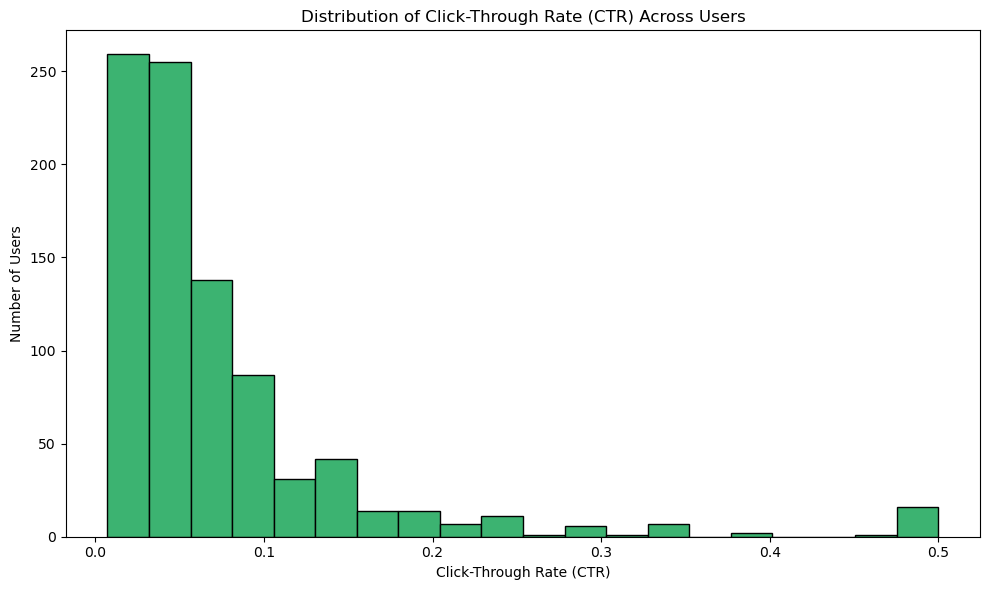

In [13]:

merged_null_df['Clicked'] = merged_null_df['Impressions'].apply(lambda x: sum(['1' in impression for impression in x]))
merged_null_df['Total_Impressions'] = merged_null_df['Impressions'].apply(len)
merged_null_df['CTR'] = merged_null_df['Clicked'] / merged_null_df['Total_Impressions']
average_ctr = merged_null_df['CTR'].mean()


user_ctr = merged_null_df.groupby('User ID')['CTR'].mean().sort_values(ascending=False)



plt.figure(figsize=(10, 6))
user_ctr.hist(bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Click-Through Rate (CTR) Across Users')
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Number of Users')
plt.grid(False)
plt.tight_layout()
plt.show()




**POLITICAL ANALYSIS**

In [15]:

political_keywords = ["Democrat", "Republican", "Conservative", "Liberal", "Green","Constitution","American Solidarity"]

def find_political_keyword(entities):
    for keyword in political_keywords:
        if keyword.lower() in str(entities).lower():
            return keyword 
    return "Non-Political"  

merged_null_df["Political Group Title"] = merged_null_df["Title Entities_y"].apply(find_political_keyword)
merged_null_df["Political Group Abstract"] = merged_null_df["Abstract Entities_y"].apply(find_political_keyword)

In [16]:
unique_political_groups_title = merged_null_df["Political Group Abstract"].unique()
unique_political_groups_title 

array(['Non-Political', 'Republican', 'Democrat', 'Green', 'Conservative',
       'Constitution'], dtype=object)

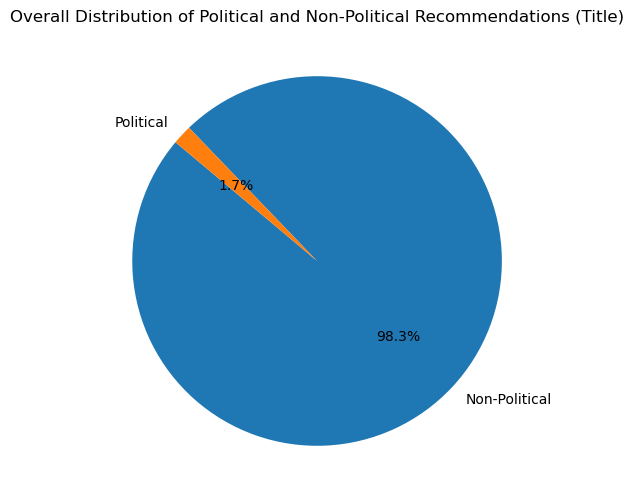

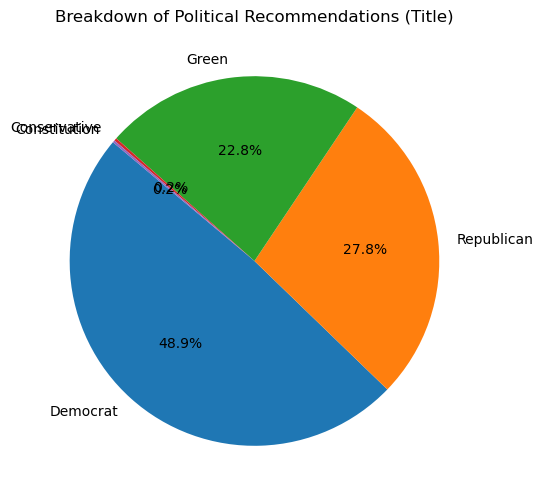

In [17]:
overall_counts = merged_null_df['Political Group Abstract'].value_counts()

political_counts = overall_counts[overall_counts.index != 'Non-Political']
non_political_count = overall_counts.get('Non-Political', 0)

data = {
    'Non-Political': non_political_count,
    'Political': political_counts.sum() 
}
labels = list(data.keys())
sizes = list(data.values())


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Overall Distribution of Political and Non-Political Recommendations (Title)')

plt.figure(figsize=(8, 6))
plt.pie(political_counts, labels=political_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Breakdown of Political Recommendations (Title)')
plt.show()



**TITLE SENTIMENT ANALYSIS**

In [23]:
#SENTIMENT SCORING
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(title):
    score = analyzer.polarity_scores(title)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

#predicted sentiment
merged_null_df['Title_Sentiment'] = merged_null_df['Title_y'].apply(get_sentiment)
merged_null_df['Impressions'] = pd.to_numeric(merged_null_df['Impressions'], errors='coerce')



In [24]:
# Calculate CTR for each sentiment category
ctr_by_sentiment = merged_null_df.groupby('Title_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()
ctr_by_sentiment.columns = ['Title_Sentiments', 'CTR']

print(ctr_by_sentiment)

  Title_Sentiments       CTR
0         Negative  0.052703
1          Neutral  0.037233
2         Positive  0.031864


/var/folders/q7/pdxjhkc1163c0jj4hv5bt8jc0000gn/T/ipykernel_11182/3990966361.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ctr_by_sentiment = merged_null_df.groupby('Title_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()


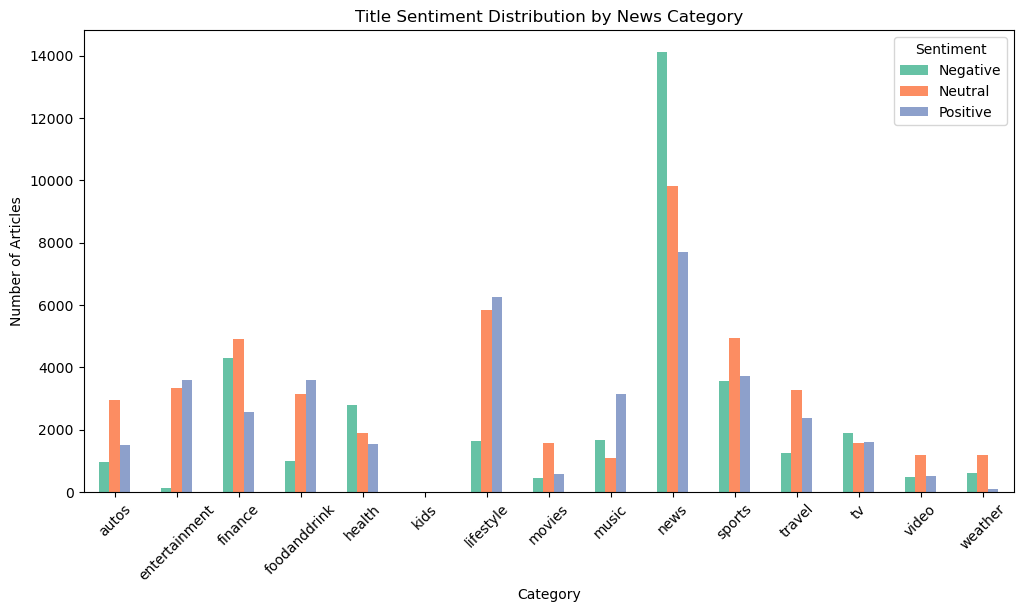

In [25]:

category_sentiment_counts = merged_null_df.groupby(['Category_y', 'Title_Sentiment']).size().unstack()
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 
category_sentiment_counts.plot(kind='bar', color= colors, stacked=False, figsize=(12, 6))
plt.title('Title Sentiment Distribution by News Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

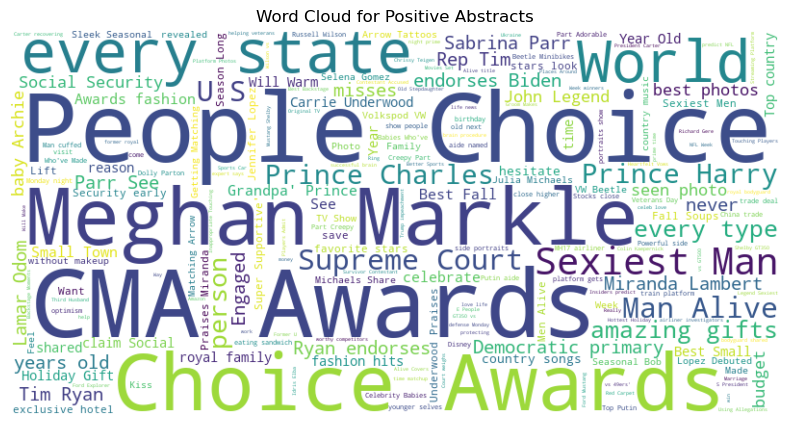

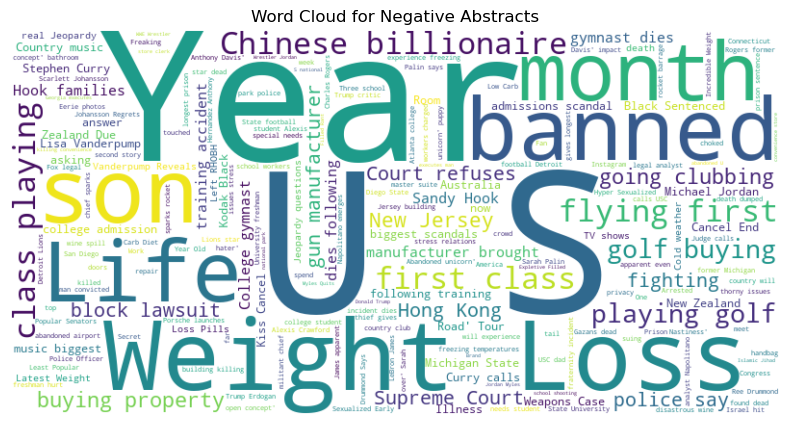

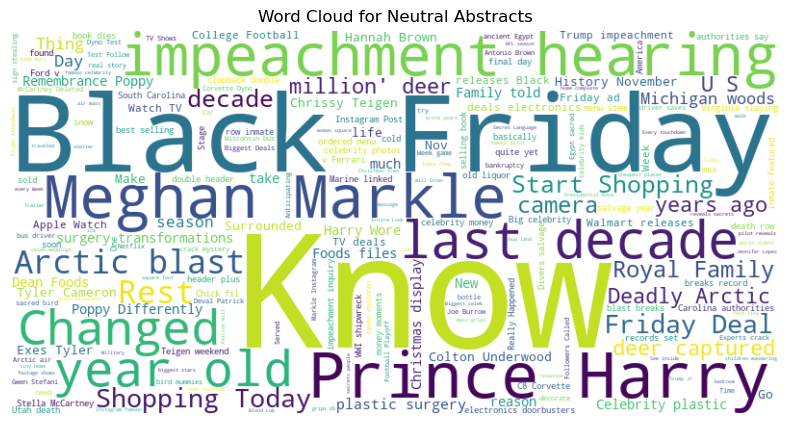

In [26]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(merged_null_df[merged_null_df['Title_Sentiment'] == sentiment]['Title_y'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Abstracts')
    plt.show()


**Abstract Sentiment Analysis**

In [27]:
merged_null_df2 = merged_null_df.dropna()
merged_null_df2.head(5)

,Impression ID,User ID,Time,News_ID,Impressions,Category_y,SubCategory_y,Title_y,Abstract_y,URL_y,Title Entities_y,Abstract Entities_y,Clicked,Total_Impressions,CTR,Political Group Title,Political Group Abstract,Title_Sentiment
0,29,U33207,11/11/2019 11:09:14 AM,N62212,0,travel,travelnews,The world's first hybrid cruise ship is curren...,The MS Roald Amundsen's maiden voyage is a pol...,https://assets.msn.com/labs/mind/BBWvNny.html,[],"[{""Label"": ""MS Roald Amundsen"", ""Type"": ""V"", ""...",0,1,0.0,Non-Political,Non-Political,Neutral
1,29,U33207,11/11/2019 11:09:14 AM,N27521,0,news,newsworld,Bolivian Leader Evo Morales Steps Down,"President Evo Morales of Bolivia, who came to ...",https://assets.msn.com/labs/mind/BBWyw2S.html,"[{""Label"": ""Evo Morales"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""Evo Morales"", ""Type"": ""P"", ""Wikida...",0,1,0.0,Non-Political,Non-Political,Neutral
2,29,U33207,11/11/2019 11:09:14 AM,N28983,0,tv,tv-gallery,ICYMI: The week in TV news for Nov. 3-9,"DWTS judge frustrated with Sean Spicer's run, ...",https://assets.msn.com/labs/mind/BBWtoek.html,[],"[{""Label"": ""Donald Trump Jr."", ""Type"": ""P"", ""W...",0,1,0.0,Non-Political,Non-Political,Neutral
3,29,U33207,11/11/2019 11:09:14 AM,N12028,0,finance,markets,"Frackers Prepare to Pull Back, Exacerbating a ...",After pushing U.S. oil and natural-gas product...,https://assets.msn.com/labs/mind/BBWAqCG.html,[],[],0,1,0.0,Non-Political,Non-Political,Positive
4,29,U33207,11/11/2019 11:09:14 AM,N25437,0,health,weightloss,Is it really easier for men to lose weight? Ex...,There are reasons men and women lose weight di...,https://assets.msn.com/labs/mind/BBWtVz8.html,[],[],0,1,0.0,Non-Political,Non-Political,Positive


In [29]:
#sentiment function 
def get_sentiment(text):
    score = analyzer.polarity_scores(text) 
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

merged_null_df2['Abstract_Sentiment'] = merged_null_df2['Abstract_y'].apply(get_sentiment)



/var/folders/q7/pdxjhkc1163c0jj4hv5bt8jc0000gn/T/ipykernel_11182/2571763507.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_null_df2['Abstract_Sentiment'] = merged_null_df2['Abstract_y'].apply(get_sentiment)


In [30]:
ctr_by_sentiment2 = merged_null_df2.groupby('Abstract_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()
ctr_by_sentiment2.columns = ['Abstract_Sentiment', 'CTR']

print(ctr_by_sentiment2)

  Abstract_Sentiment       CTR
0           Negative  0.049965
1            Neutral  0.041478
2           Positive  0.032222


/var/folders/q7/pdxjhkc1163c0jj4hv5bt8jc0000gn/T/ipykernel_11182/658695106.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ctr_by_sentiment2 = merged_null_df2.groupby('Abstract_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()


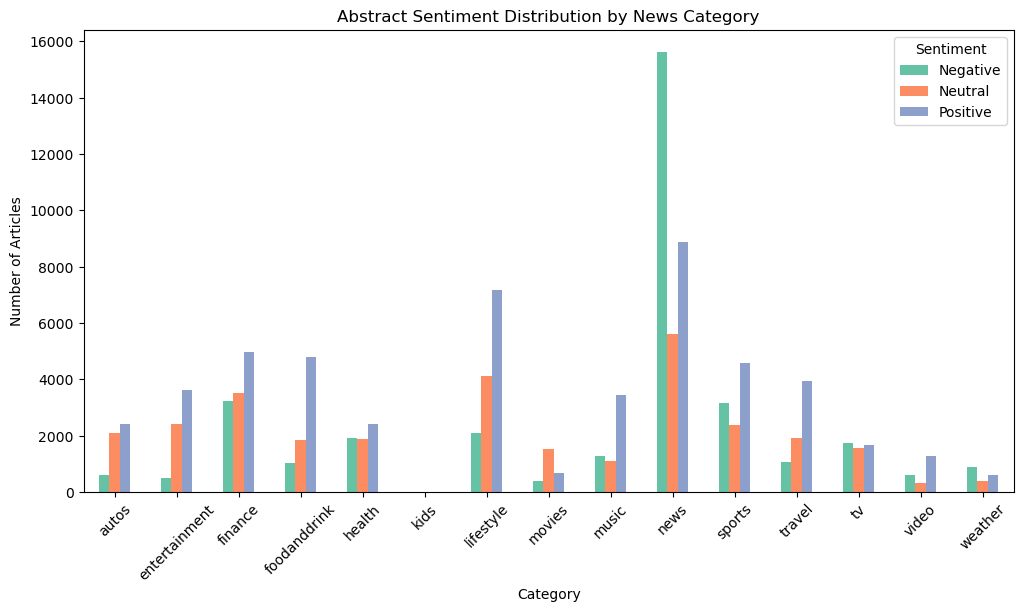

In [31]:
category_sentiment_counts = merged_null_df2.groupby(['Category_y', 'Abstract_Sentiment']).size().unstack()
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 
category_sentiment_counts.plot(kind='bar', color= colors, stacked=False, figsize=(12, 6))
plt.title('Abstract Sentiment Distribution by News Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


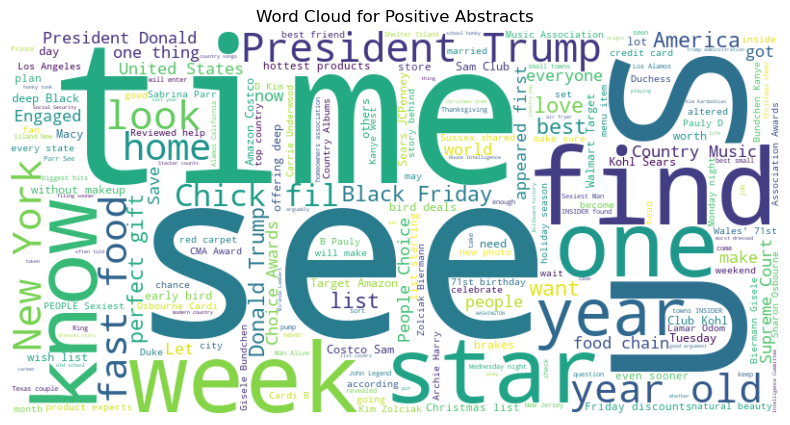

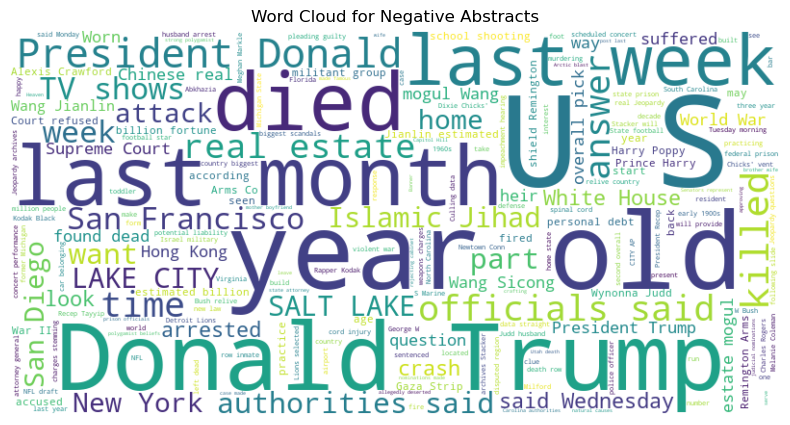

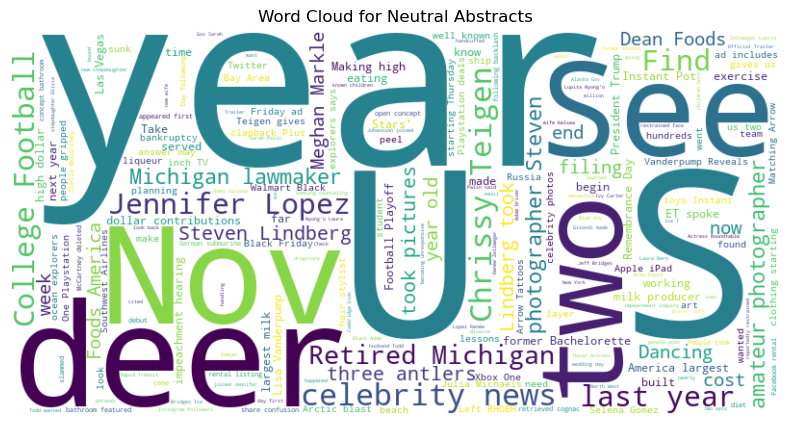

In [32]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(merged_null_df2[merged_null_df2['Abstract_Sentiment'] == sentiment]['Abstract_y'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Abstracts')
    plt.show()


# Analyzing User Engagement with Content Categories

* Goal: See if users tend to engage more with specific categories (e.g., tv, health, news).
* How: Group by User ID and Category to count the frequency of interactions per category. This could help identify user preferences.


In [109]:
category_engagement = merged_df.groupby(['User ID', 'Category']).size().unstack(fill_value=0)
category_engagement.head()


Category,autos,entertainment,finance,foodanddrink,health,kids,lifestyle,middleeast,movies,music,news,sports,travel,tv,video,weather
User ID,,,,,,,,,,,,,,,,
U100,0,0,0,0,0,0,2,0,0,1,1,2,0,4,0,0
U1000,0,3,3,0,0,0,3,0,0,0,0,0,0,0,0,0
U10001,0,0,0,2,0,0,2,0,0,0,6,18,0,2,0,0
U10003,2,0,0,0,2,0,2,0,0,0,8,2,0,0,0,0
U10008,0,2,0,1,1,0,0,0,0,0,11,1,1,3,0,3


**Numbers in the cells:** The numbers indicate how many times a user has read or interacted with articles from each category.

## Summarizing Category Engagement

Category
news             1603654
sports            728254
lifestyle         529650
finance           391906
tv                366764
foodanddrink      273451
health            230010
movies            181275
autos             178621
entertainment     165519
travel            164224
music             131851
video             101820
weather            60410
kids                 161
middleeast            69
dtype: int64


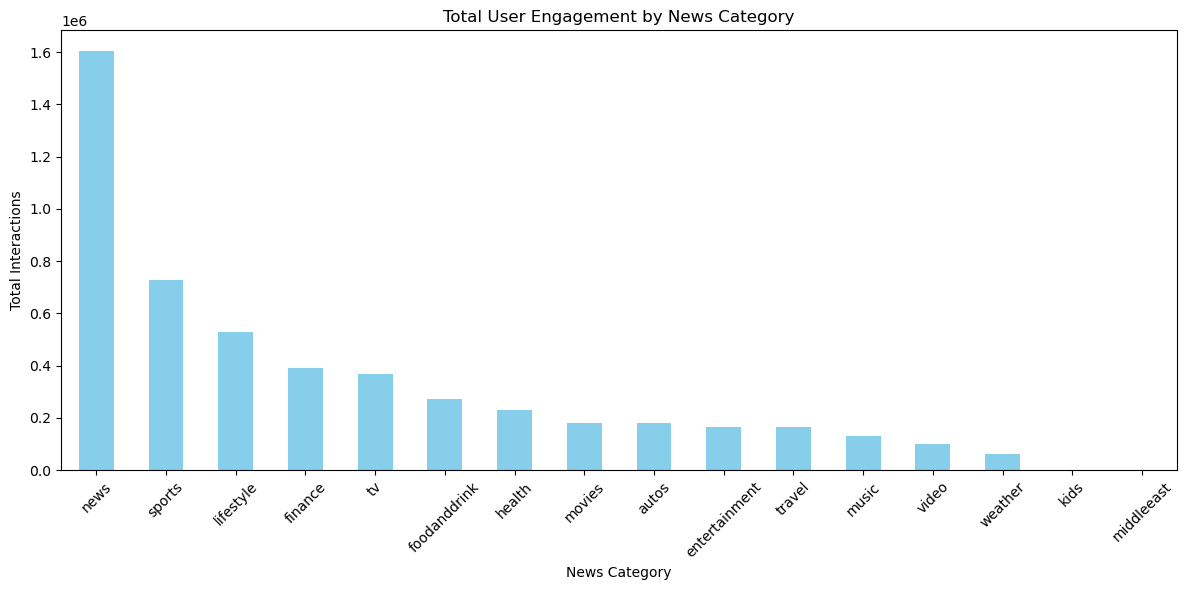

In [110]:
import matplotlib.pyplot as plt

# Calculate the total engagement for each category
category_totals = category_engagement.sum().sort_values(ascending=False)

# Display the total engagement per category
print(category_totals)

# Plot the total engagement per category as a bar chart
plt.figure(figsize=(12, 6))
category_totals.plot(kind='bar', color='skyblue')
plt.title('Total User Engagement by News Category')
plt.xlabel('News Category')
plt.ylabel('Total Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This would be an indication that the recommandation system is promoting the "news" category more than the others (*need to figure out what exactly is within this "news" category*) 

# Exploring Reading Patterns Over Time

Hour
0.0      32828
1.0      36781
2.0      57034
3.0     102765
4.0     172382
5.0     286468
6.0     355805
7.0     384384
8.0     409298
9.0     336132
10.0    388312
11.0    401246
12.0    371525
13.0    346107
14.0    283367
15.0    220561
16.0    205660
17.0    168790
18.0    143551
19.0    117660
20.0    102850
21.0     85318
22.0     58823
23.0     43230
dtype: int64


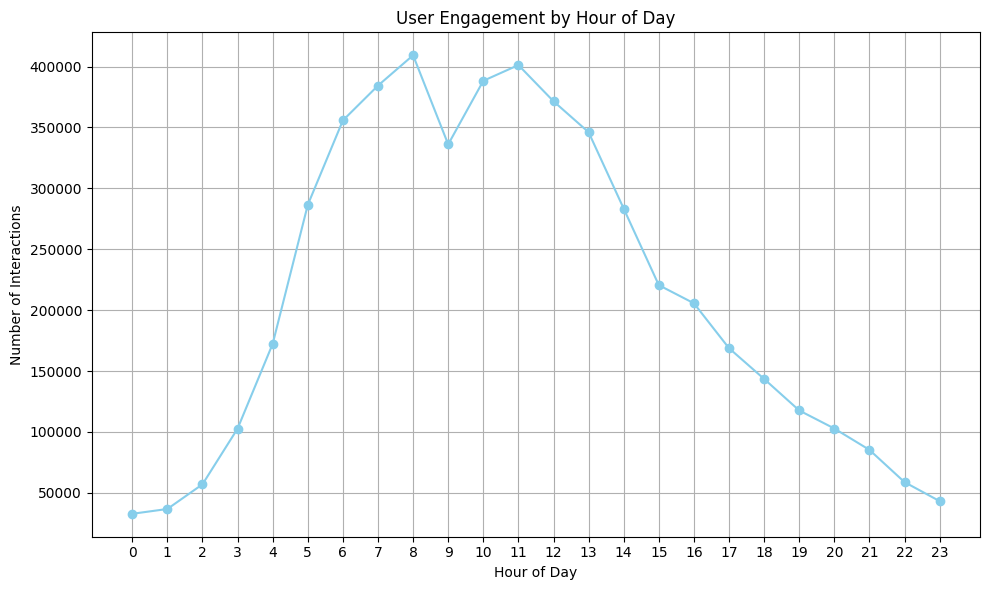

In [49]:
# Extract the hour from the 'Time' column
merged_df['Hour'] = merged_df['Time'].dt.hour

# Calculate the number of interactions for each hour
hourly_engagement = merged_df.groupby('Hour').size()

# Display the hourly engagement data
print(hourly_engagement)

# Plot the hourly engagement as a line chart
plt.figure(figsize=(10, 6))
hourly_engagement.plot(kind='line', marker='o', color='skyblue')
plt.title('User Engagement by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Interactions')
plt.xticks(range(0, 24))  # Show each hour on the x-axis
plt.grid(True)
plt.tight_layout()
plt.show()


Peak times seem to be around 8am and 11am -- so in the morning when people are waking up, eating breakfast and heading to work 

# Assess Recommendation Performance


In [111]:
# Step 1: Ensure 'Impressions' column has lists, replacing NaNs with empty lists
merged_df['Impressions'] = merged_df['Impressions'].apply(lambda x: x if isinstance(x, list) else [])

# Step 2: Separate clicks from non-clicks in the Impressions column
# Count the number of clicked (-1) and not clicked (-0) impressions
merged_df['Clicked'] = merged_df['Impressions'].apply(lambda x: sum(['-1' in impression for impression in x]))
merged_df['Total_Impressions'] = merged_df['Impressions'].apply(len)

# Step 3: Calculate Click-Through Rate (CTR)
merged_df['CTR'] = merged_df['Clicked'] / merged_df['Total_Impressions']

# Display the first few rows with CTR
print(merged_df[['User ID', 'Impression ID', 'Clicked', 'Total_Impressions', 'CTR']].head())




  User ID  Impression ID  Clicked  Total_Impressions  CTR
0  U13740              1        0                  0  NaN
1  U13740              1        0                  0  NaN
2  U13740              1        0                  0  NaN
3  U13740              1        0                  0  NaN
4  U13740              1        0                  0  NaN


In [106]:
# Calculate the overall average CTR
average_ctr = merged_df['CTR'].mean()
print(f"Overall Average CTR: {average_ctr:.2%}")

# Calculate average CTR per user
user_ctr = merged_df.groupby('User ID')['CTR'].mean().sort_values(ascending=False)

# Display the first few rows of the per-user CTR
user_ctr.head()

import matplotlib.pyplot as plt

# Plot the distribution of CTR across users
plt.figure(figsize=(10, 6))
user_ctr.hist(bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Click-Through Rate (CTR) Across Users')
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Number of Users')
plt.grid(False)
plt.tight_layout()
plt.show()



KeyError: 'CTR'

The Click-Through Rate (CTR) is a metric that represents how often users click on recommended articles compared to the total number of recommendations they see. 

**Interpreting CTR Values**
* CTR Values range from 0 to 1, often displayed as a percentage (e.g., 0.25 = 25%).
* Higher CTR (closer to 1 or 100%): Indicates users are clicking on a high percentage of the recommended articles, which suggests the recommendations are relevant and engaging for them.
* Lower CTR (closer to 0): Indicates users are not clicking on many of the recommended articles, suggesting that recommendations may not align with their interests.

**Example Interpretations**
* CTR of 0.75 (75%): This means that, on average, users click on 75% of the articles recommended to them. This is generally a strong signal that the recommendation algorithm is doing a good job matching users' interests.
* CTR of 0.20 (20%): This would suggest that users only click on 20% of the recommended articles, indicating room for improvement in recommendation quality.

**What CTR Tells You About Recommendation Performance**
* High CTR: The recommendation algorithm is performing well, successfully engaging users.
* Low CTR: The recommendations may be poorly matched to users’ interests, signaling a need to adjust or improve the algorithm.

A right-skewed CTR distribution with most values between 0.0 and 0.1 could hint at potential biases in the recommendation system:

Content Bias: If only a small subset of recommendations consistently receives clicks, it might indicate that the system favors certain types of content, leading to low engagement for other categories.

User Group Bias: The few users with higher CTRs may belong to specific demographic or interest groups that the system better serves, while other users receive less relevant recommendations.

Recommendation Algorithm Bias: The algorithm may prioritize popular or trending content, possibly neglecting niche or diverse topics that would engage a broader audience.

In short, the low engagement for most users suggests that the recommendation system might unintentionally favor specific content types or user groups, which could reflect inherent biases in the algorithm's design or data usage.

# Looking for Bias or Personalization Patterns

## 1. Analyze CTR by Category:

Determine if some categories have significantly higher CTRs, suggesting they may be over-represented in recommendations.